In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

%matplotlib inline

In [2]:
df = pd.read_csv("cars-dataset.csv")  
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
df.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

Column name 'car name' does not have any impact on our model so we are dropping that column

In [4]:
df.drop(columns='car name',inplace=True)


In [5]:
print('The new shape of the dataframe is',df.shape)

The new shape of the dataframe is (398, 7)


In [6]:
b=df.hp.unique()
print(b.shape)

(94,)


There are 94 unique horse power ratings in the dataset

In [7]:
#Lets analysze the distribution of the dependent (mpg) column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [8]:
print('Number of unique cylinder models:',df.cyl.nunique())

Number of unique cylinder models: 5


C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


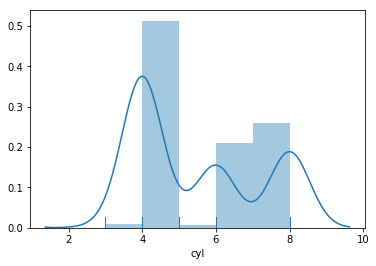

In [9]:
sns.distplot(df['cyl'],kde=True,rug=True);

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


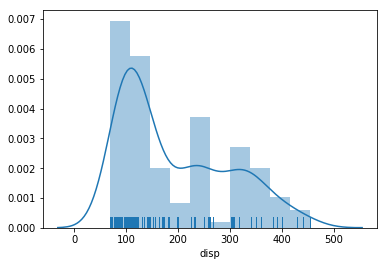

In [10]:
sns.distplot(df['disp'],kde=True,rug=True);

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


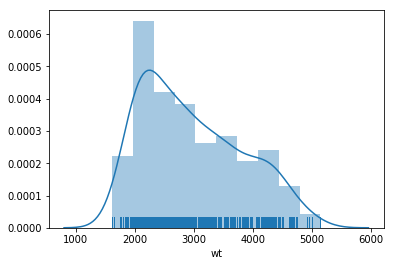

In [11]:
sns.distplot(df['wt'],kde=True,rug=True);

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


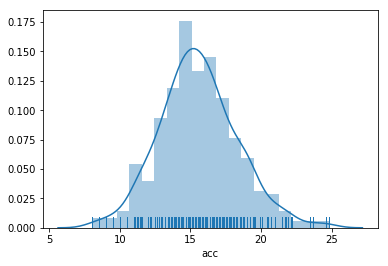

In [12]:
sns.distplot(df['acc'],kde=True,rug=True);

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


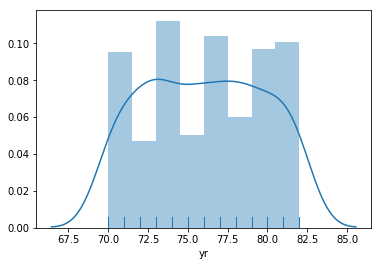

In [13]:
sns.distplot(df['yr'],kde=True,rug=True);

C:\Users\sharan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


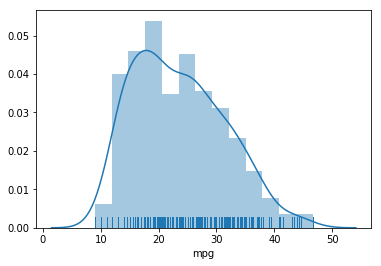

In [14]:
sns.distplot(df['mpg'],kde=True,rug=True);

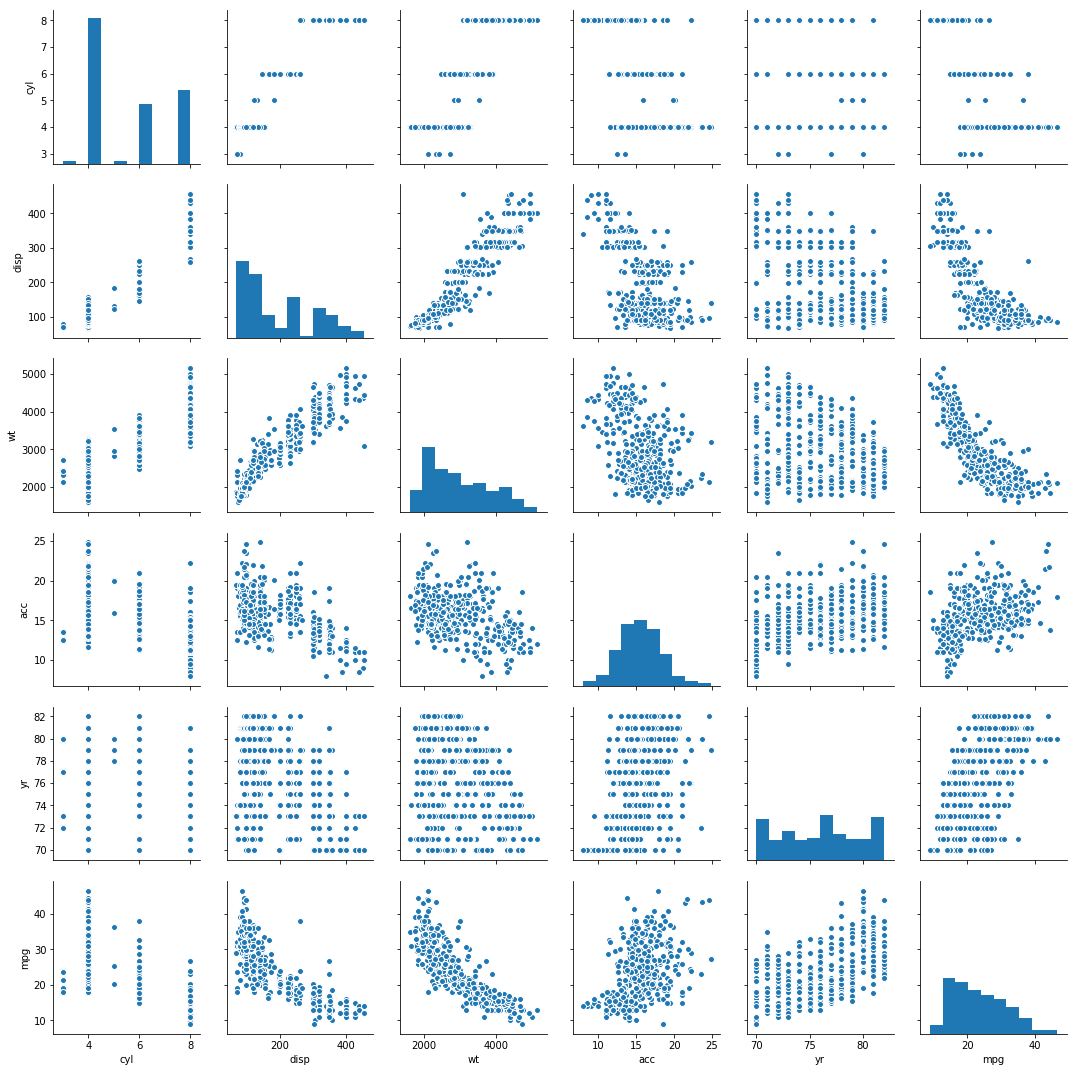

In [15]:
sns.pairplot(df)

In [16]:
df.dtypes


cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [17]:
#df['hp']=df['hp'].replace('?',np.nan)

In [18]:
#df.hp[374]=0
#df.hp[32]=0
#df=df.fillna(df.mean())
df['hp']=df['hp'].replace('?',np.nan)
df.hp

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374    NaN
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [19]:

df.isna().sum()


cyl     0
disp    0
hp      6
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [20]:
df=df.fillna(0)

In [21]:
df.hp

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      0
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [22]:
df["hp"]=df["hp"].astype('int')
df.dtypes

cyl       int64
disp    float64
hp        int32
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [23]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
k=0
distortion=[]
from sklearn.cluster import KMeans
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    distortion.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

Text(0.5,1,'Selecting k with the Elbow Method')

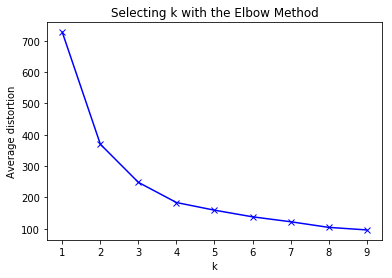

In [24]:
plt.plot(clusters, distortion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [25]:
## The optimal value for K from above Elbow chart is 2 since the curve takes a steep change there
final_model=KMeans(2)
final_model.fit(df)
prediction=final_model.predict(df)

In [26]:
kmeans=KMeans(n_clusters=4,random_state=0).fit(df)
kmeans.cluster_centers_

array([[4.71000000e+00, 1.55100000e+02, 9.15100000e+01, 2.75536000e+03,
        1.57670000e+01, 7.72300000e+01, 2.45540000e+01],
       [6.64044944e+00, 2.59966292e+02, 1.16808989e+02, 3.48448315e+03,
        1.56752809e+01, 7.55842697e+01, 1.83528090e+01],
       [8.00000000e+00, 3.56536232e+02, 1.65130435e+02, 4.36659420e+03,
        1.30420290e+01, 7.36086957e+01, 1.39913043e+01],
       [3.97857143e+00, 9.81107143e+01, 7.15071429e+01, 2.10913571e+03,
        1.66028571e+01, 7.65928571e+01, 3.07471429e+01]])

In [27]:
df1=kmeans.cluster_centers_

In [28]:
s=[df,df1]

In [29]:
f=pd.DataFrame(df1,columns=df.columns)
f

,cyl,disp,hp,wt,acc,yr,mpg
0,4.710000,155.100000,91.510000,2755.360000,15.767000,77.230000,24.554000
1,6.640449,259.966292,116.808989,3484.483146,15.675281,75.584270,18.352809
2,8.000000,356.536232,165.130435,4366.594203,13.042029,73.608696,13.991304
3,3.978571,98.110714,71.507143,2109.135714,16.602857,76.592857,30.747143


In [30]:
print(kmeans.labels_)

[1 1 1 1 1 2 2 2 2 1 1 1 1 1 3 0 0 0 3 3 0 3 3 3 0 2 2 2 2 3 3 3 3 0 1 1 1
 1 2 2 2 2 2 2 2 0 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 1 2 2 2 2 3 1 2
 2 2 0 0 0 3 3 3 0 3 3 2 1 2 2 1 2 2 2 2 2 2 1 1 1 0 0 0 3 2 2 2 2 0 3 3 3
 3 3 0 3 2 2 3 3 0 0 1 0 0 1 0 0 0 1 3 0 3 0 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3
 3 0 3 3 1 1 1 1 2 2 2 2 1 1 1 1 0 1 1 3 0 0 0 0 3 0 0 3 1 0 0 0 0 3 0 3 0
 3 3 2 2 2 2 1 1 0 0 3 3 3 3 1 1 1 1 3 3 3 0 1 2 1 0 1 2 2 1 1 3 3 3 3 3 1
 2 2 2 1 1 1 1 2 2 2 2 3 0 3 0 3 3 3 3 0 0 0 3 3 3 3 3 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 2 3 0 3 3 0 0 0 3 0 1 0 1 3 3 1 0 0 1 1 1 1 2 1 2 2 1 2 3 3 3
 0 1 1 1 1 3 3 3 3 0 0 0 0 3 3 3 3 0 0 0 1 3 0 0 0 3 3 0 3 3 3 0 1 3 3 3 3
 0 3 0 0 3 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 1 1 0 0 1 1 0 1 0 0 3
 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 3 0 0 3 3 0 0]


In [31]:
from sklearn.cluster import AgglomerativeClustering 

In [32]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [33]:
model.fit(df1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x000000A5F5E88598>)

In [34]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage,fcluster
from scipy.spatial.distance import pdist

In [35]:
Z = linkage(df1, 'ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(df1))

c

0.6167152321865748

In [36]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x000000A5F5E88598>)

In [37]:
array = df.values
X = array[:,0:5] # select all rows and first 8 columns which are the attributes
Y = array[:,6]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [41]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
regression_model.score(X_train, y_train)

0.7236030526765156

In [51]:
regression_model.score(X_test, y_test)

0.6397111377132418

## dataset 2

In [52]:
dt=pd.read_csv('vehicle.csv')
dt.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [53]:
dt.shape

(846, 19)

In [54]:
dt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [57]:
dt1 = pd.get_dummies(dt, columns=['class'])
dt1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,0,0,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,0,0,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,0,1,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,0,0,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,325.0,188.0,127.0,9.0,11.0,180.0,183,1,0,0


In [ ]:
#sns.pairplot( dt1 )

In [66]:
dt1.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
compactness,1.000000,0.689786,0.791707,0.691081,0.091779,0.148249,0.812770,-0.788736,0.814248,0.676143,...,0.818674,0.585845,-0.250603,0.236685,0.157670,0.298528,0.365552,-0.149396,0.308819,-0.209965
circularity,0.689786,1.000000,0.797180,0.625051,0.154283,0.251407,0.858265,-0.827246,0.856603,0.965729,...,0.850863,0.935950,0.053080,0.144968,-0.011869,-0.106339,0.045652,0.014493,0.199720,-0.249776
distance_circularity,0.791707,0.797180,1.000000,0.771748,0.158684,0.264621,0.907949,-0.913020,0.896273,0.775149,...,0.890541,0.706950,-0.227001,0.114665,0.266049,0.146027,0.333648,-0.198413,0.437455,-0.311650
radius_ratio,0.691081,0.625051,0.771748,1.000000,0.665363,0.450486,0.738480,-0.792946,0.712744,0.571083,...,0.725598,0.541325,-0.181520,0.049112,0.174469,0.382912,0.472339,-0.055845,0.354381,-0.359918
pr.axis_aspect_ratio,0.091779,0.154283,0.158684,0.665363,1.000000,0.648861,0.103832,-0.183492,0.079566,0.127322,...,0.089750,0.122454,0.152860,-0.058539,-0.032180,0.240201,0.267760,0.129481,-0.088216,-0.029411
max.length_aspect_ratio,0.148249,0.251407,0.264621,0.450486,0.648861,1.000000,0.165998,-0.180053,0.161603,0.305943,...,0.143745,0.189752,0.295638,0.015446,0.043491,-0.026184,0.143919,-0.199056,0.056862,0.138234
scatter_ratio,0.812770,0.858265,0.907949,0.738480,0.103832,0.165998,1.000000,-0.973504,0.992078,0.810017,...,0.996328,0.800577,-0.028006,0.074376,0.213512,0.005171,0.118504,0.019915,0.370873,-0.457526
elongatedness,-0.788736,-0.827246,-0.913020,-0.792946,-0.183492,-0.180053,-0.973504,1.000000,-0.950405,-0.776150,...,-0.956488,-0.766671,0.103535,-0.052243,-0.186027,-0.114846,-0.216769,-0.061825,-0.368363,0.497784
pr.axis_rectangularity,0.814248,0.856603,0.896273,0.712744,0.079566,0.161603,0.992078,-0.950405,1.000000,0.813135,...,0.992316,0.798522,-0.015711,0.083219,0.215200,-0.019066,0.099481,-0.000409,0.364159,-0.429041
max.length_rectangularity,0.676143,0.965729,0.775149,0.571083,0.127322,0.305943,0.810017,-0.776150,0.813135,1.000000,...,0.797485,0.866554,0.041283,0.136077,0.001660,-0.104437,0.076770,-0.052675,0.137634,-0.107919


elongatedness has negative correlation with all columns except class_van column 

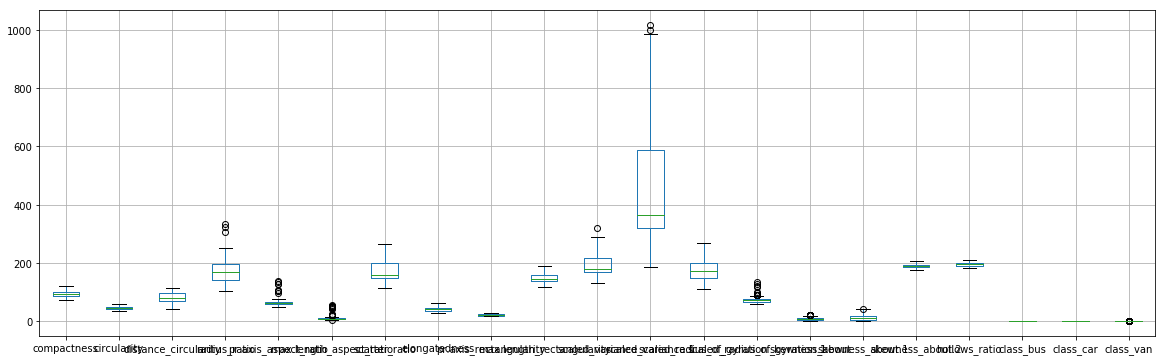

In [77]:
plt.figure(figsize=(20, 6))
dt1.boxplot()

In [75]:
dt.groupby('class').nunique()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
class,,,,,,,,,,,,,,,,,,,
bus,36,24,45,91,32,8,76,22,12,48,73,130,97,26,15,30,25,29,1
car,43,27,56,119,25,11,107,31,9,66,100,299,124,29,23,41,30,30,1
van,18,17,40,70,30,17,46,17,4,45,50,121,75,34,20,27,27,28,1


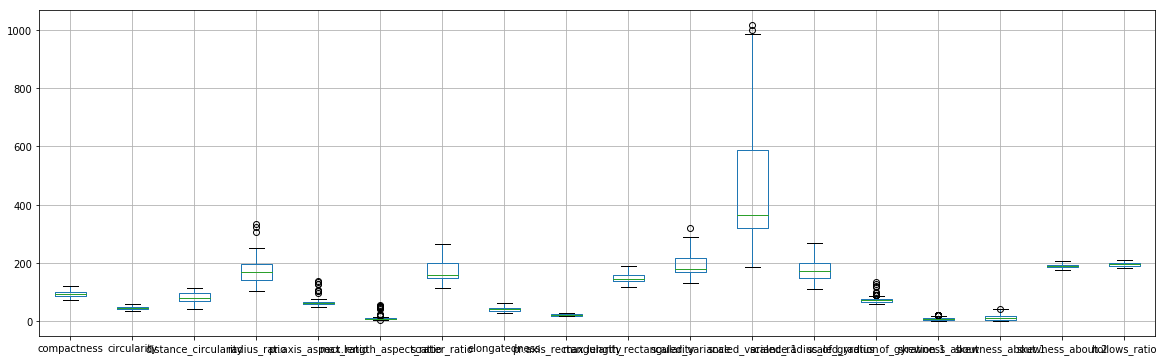

In [79]:
plt.figure(figsize=(20, 6))
dt.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A58FEC14A8>,
      dtype=object)

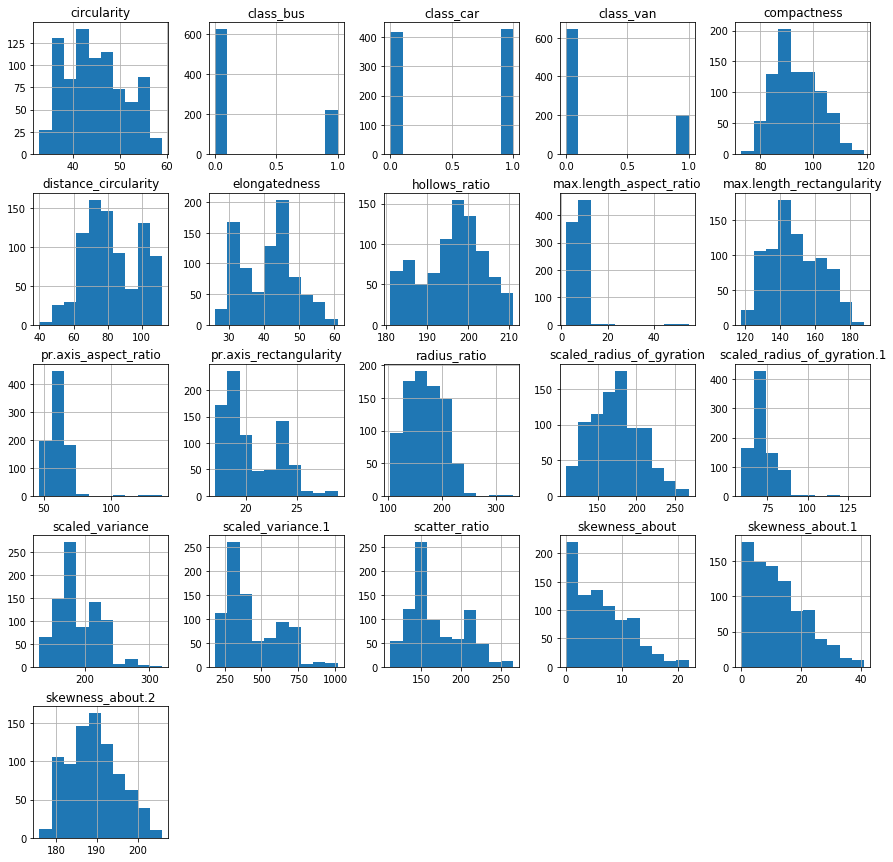

In [84]:
dt1.hist(figsize=(15,15))

In [89]:
from sklearn.decomposition import PCA
dt1=dt1.fillna(0)
dt1

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,...,379.0,184.0,70.0,6.0,16.0,187.0,197,0,0,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,...,330.0,158.0,72.0,9.0,14.0,189.0,199,0,0,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,...,635.0,220.0,73.0,14.0,9.0,188.0,196,0,1,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,...,309.0,127.0,63.0,6.0,10.0,199.0,207,0,0,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,...,325.0,188.0,127.0,9.0,11.0,180.0,183,1,0,0
5,107,0.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,...,957.0,264.0,85.0,5.0,9.0,181.0,183,1,0,0
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,...,361.0,172.0,66.0,13.0,1.0,200.0,204,1,0,0
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,...,281.0,164.0,67.0,3.0,3.0,193.0,202,0,0,1
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,...,223.0,112.0,64.0,2.0,14.0,200.0,208,0,0,1
9,93,44.0,98.0,0.0,62.0,11,183.0,36.0,22.0,146,...,505.0,152.0,64.0,4.0,14.0,195.0,204,0,1,0


In [91]:

dt1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class_bus                      0
class_car                      0
class_van                      0
dtype: int64

In [92]:
from sklearn import preprocessing
names = dt1.columns
scaler = preprocessing.StandardScaler()

In [94]:
scaled_dt = scaler.fit_transform(dt1)
scaled_dt = pd.DataFrame(scaled_dt, columns=names)
scaled_dt.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
0,0.160580,0.488951,0.076470,0.284286,1.241960,0.311542,-0.198998,0.140516,-0.178035,0.758332,...,-0.334694,0.288657,-0.234766,-0.064746,0.381885,-0.189712,0.183957,-0.589181,-1.014286,1.803124
1,-0.325470,-0.507116,0.136316,-0.735976,-0.537879,0.094079,-0.584991,0.518700,-0.527497,-0.344578,...,-0.610532,-0.484799,-0.011732,0.543864,0.158072,0.033976,0.452977,-0.589181,-1.014286,1.803124
2,1.254193,0.773541,1.452926,1.139100,0.530024,0.311542,1.137132,-1.120101,0.870349,0.689401,...,1.106421,1.359595,0.099786,1.558214,-0.401462,-0.077868,0.049447,-0.589181,0.985915,-0.554593
3,-0.082445,-0.507116,0.016624,-0.239632,0.174057,0.094079,-0.733450,0.644762,-0.527497,-0.344578,...,-0.728748,-1.406996,-1.015388,-0.064746,-0.289555,1.152416,1.529056,-0.589181,-1.014286,1.803124
4,-1.054545,-0.080230,-0.701527,1.028802,4.920292,9.444962,-0.584991,0.518700,-0.527497,-0.275646,...,-0.638679,0.407650,6.121723,0.543864,-0.177649,-0.972619,-1.699181,1.697273,-1.014286,-0.554593


In [96]:
pca = PCA(n_components=3)
pca.fit(dt1)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
X_pca = pca.transform(dt1)

In [98]:
pca.explained_variance_

array([35213.04940581,   881.92923759,   526.55953391])

In [99]:
pca.components_

array([[ 3.52909940e-02,  2.57219755e-02,  7.42136262e-02,
         1.25368709e-01,  3.92399877e-03,  3.88393312e-03,
         1.75642106e-01, -3.94231299e-02,  1.34981663e-02,
         6.13736954e-02,  1.57886912e-01,  9.46512086e-01,
         1.39859255e-01,  5.88410436e-04,  2.13359567e-03,
         9.14302736e-03,  1.47517243e-03,  4.20752633e-03,
         7.72222022e-05,  9.11373341e-04, -9.88595543e-04],
       [-4.24646131e-02, -1.55475491e-02, -9.82713523e-02,
        -9.21074665e-01, -1.96130398e-01, -6.91840248e-02,
        -3.32134357e-02,  3.54184476e-02, -1.29276047e-03,
         9.07357258e-03, -1.75311977e-01,  1.59228478e-01,
         7.34101208e-02,  5.56271561e-02,  5.33517907e-03,
        -2.52926249e-02, -1.06902923e-01, -1.32466502e-01,
         1.68841155e-03, -2.35780118e-03,  6.69389632e-04],
       [ 2.56855745e-02, -1.30619985e-01, -3.85194743e-02,
        -2.20605479e-02, -5.73891017e-02, -4.53744855e-02,
        -5.23708354e-02,  9.54269766e-03, -1.34305626e

In [100]:
pca_features = pca.transform(dt1)
pca_features

array([[ -55.75904477,  -18.38173031,  -21.25734379],
       [-115.06662651,   10.32385739,    0.49617968],
       [ 213.17377689,  -14.71878182,  -16.72248992],
       ...,
       [ 297.61964473,  -16.42418206,   12.03687206],
       [-179.52291284,   -0.88680687,    8.64437501],
       [-245.72116029,   16.80589071,   13.53828206]])

In [101]:
pca.explained_variance_ratio_

array([0.94208249, 0.02359495, 0.01408746])